<img style="float: left;" src="images/unige_csd.png" alt="drawing" width="200"/>

# <center>Imagerie Numérique 2023 Automne</center>

<center>October 20, 2023</center>

---

# <center><ins>TP Class N°2 - HVS perception and colors</ins></center>

#### *Instructions :*  

* This TP should be completed and uploaded on Moodle before **Thursday 26 October 2023, 23h59**.
* <font color=red>The name of the file you upload should be **TP2_name_surname.ipynb**.</font>
* If you need to include attached files to you TP, please archive them together in a folder named **TP2_name_surname.zip**.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import shape, uint8 as u8, uint32 as u32, float64 as f64
from numpy.typing import NDArray
from PIL import Image
import skimage as sk
import skimage.color as skc
import matplotlib.image as mpim
from copy import deepcopy

FIG_SIZE = (20, 10)

def imread(path: str, dtype: type = u8, grayscale: bool = False) -> NDArray:
    """
    Load the image at given path into a numpy array
    @param path: path to image (relative to this file)
    @param dtype: if float, returned image will be in the [0, 1] range, else in [0, 255] (defaults to uint8)
    @param grayscale: whether to load image as grayscale or not
    @return: NDArray of shape (m, n, 3) if grayscale is False, else (m, n)
    """
    img: Image = Image.open(path)
    if grayscale: img = img.convert('L')
    out = np.array(img)
    # does not check that max is indeed 1 because it would be too costly
    is_float = np.issubdtype(out.dtype, np.floating)
    if np.issubdtype(dtype, np.floating) and not is_float: out = f64(out / 255.)
    return out


def imshow_gray(data, show=True, axis=True):
    plt.imshow(data, cmap="gray")
    plt.axis("on" if axis else "off")
    if show: plt.show()


def imshow(data, show=True, axis=True):
    plt.imshow(data)
    plt.axis("on" if axis else "off")
    if show: plt.show()


def MSE(im1, im2):
    return np.sum((im1 - im2)**2) / (im1.shape[0] * im1.shape[1])


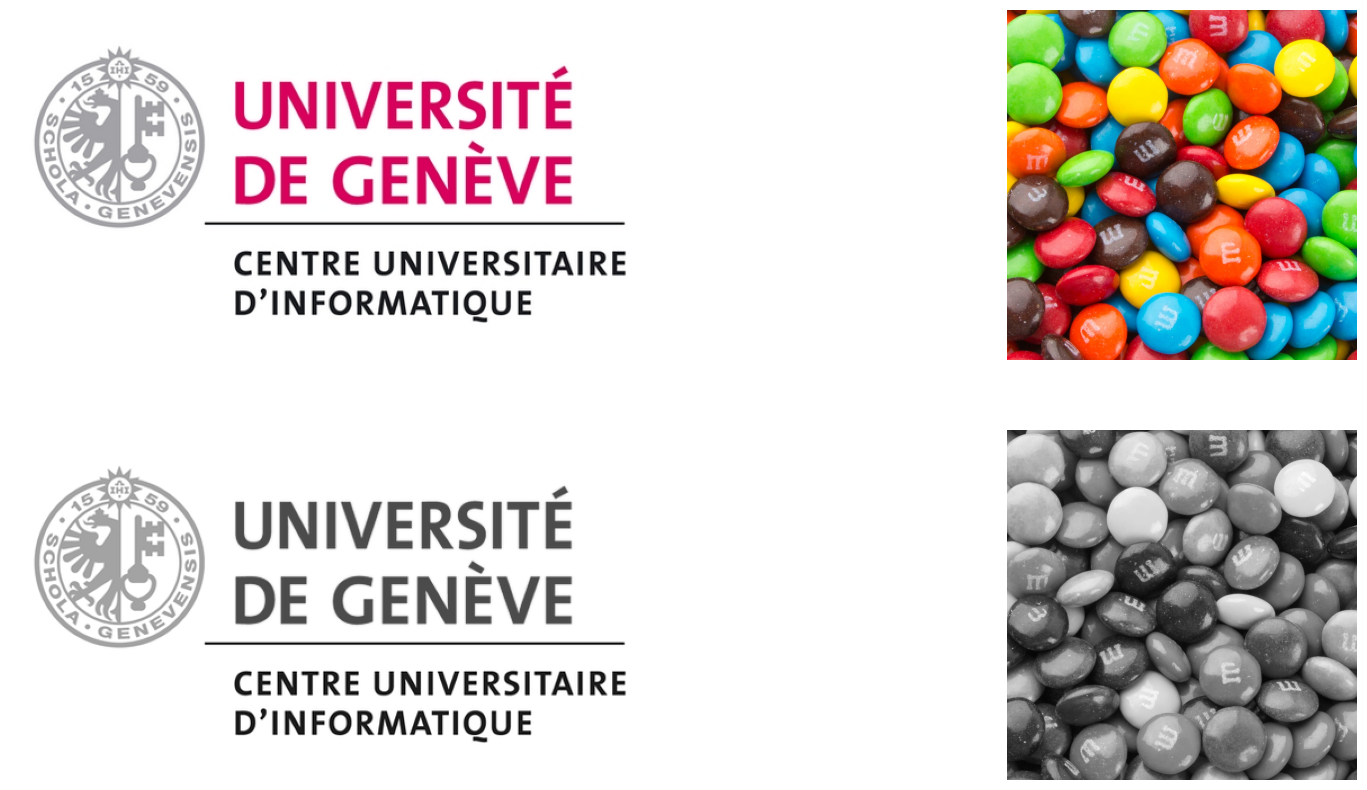

In [17]:
im1, im2 = 'images/logo_cui.jpg', "mnms.jpg"

img1, img2 = imread(im1, dtype=f64), imread(im2, dtype=f64)

plt.figure(figsize=FIG_SIZE)
plt.subplot(2, 2, 1)
imshow(img1, axis=False, show=False)
plt.subplot(2, 2, 2)
imshow(img2, axis=False, show=False)

img1, img2 = imread(im1, dtype=f64, grayscale=True), imread(im2, dtype=f64, grayscale=True)
plt.subplot(2, 2, 3)
imshow_gray(img1, axis=False, show=False)
plt.subplot(2, 2, 4)
imshow_gray(img2, axis=False, show=False)


## Exercise 1 : 

*(1 point)*

### (a) What are the main components of the HVS as an optical system? What are the characteristics and limits of each of its components?


Talk about how we have very few, but very sensitive blue sensors, a bit more green, fairly sensitive and a lot of red sensors. 
We have 3 types of cones, each sensitive to a different wavelength. The brain then interprets the signal from the cones to give us the color we see.
Red color has the highest wavelength, then green, then blue. Blue color has a very high frequency, hence a much lower wavelength.




### (b) How does the human eye sense colors? What are the main qualities of achromatic and chromatic light?


(Achromatic light)  

Rods are : 

- very sensitive to light intensity
- achromatic (one color)

they are used for peripheral vision and they have slow response.

This means that in dark areas, to be able to see anything, the brains / they eyes "focuses" on rods at the expense of color distinction.
i.e. It's hard to distinguish colors in the dark because to be able to see we have to raise the sensitivity towards light but the what allows us to do that (the rods) are not sensitive to color.


(Chromatic light)

Cones are :

- Only sensitive to  relatively high intensity light 
- Sensitive to color
- sensitive to relatively different wavelength

---

## Exercise 2 : 
*(1 point)*

### (a) What is the NTSC-YIQ color space? What is the main domain of application for this color system? What is its advantage against RGB from an application point of view ?

It is the color mixing system used for television (NTSC TV).

- Y, represents the luma component (intensity in the chromatic TV)
- I, represents orange-blue range of colors
- Q, represents the green-purple range of colors

It is interesting because it optimized on how we distinguish colors,
i.e. less bandwith is used for Q than for I, (because we are more sensitive to change in the orange-blue range of colors than in the green-purple range of colors)


### (b) Write a function that takes an RGB image and converts it to the NTSC-YIQ format.
Pay attention to the image dynamic range (is it from 0 to 1 or from 0 to 255). Convert
the RGB image *mnms.jpg* to the NTSC-YIQ using your function. Display each three
components as individual gray images. Explain the meaning of each component. 

*NB : If you use the matplotlib library to display grayscale images, pay attention to the
color maps (cmap) you are using or you might end up with strange coloured results.*

In [18]:
def rgb_2_yiq(rgb_img):
    """img must be in float range i.e. [0, 1] """
    Mat = np.array([[0.299, 0.587, 0.114],
           [0.596, -0.274, -0.322],
           [0.211, -0.523, 0.312]])
    return np.dot(rgb_img, Mat.T) # Application of the transformation matrix to each rgb_img vector
    
    

In [19]:
def image_plot(idx: int, data, title=None, col_nb=4):
    plt.subplot(1, col_nb, idx + 1)
    plt.axis("off")
    plt.title(title if title else "")
    imshow_gray(data, show=False)


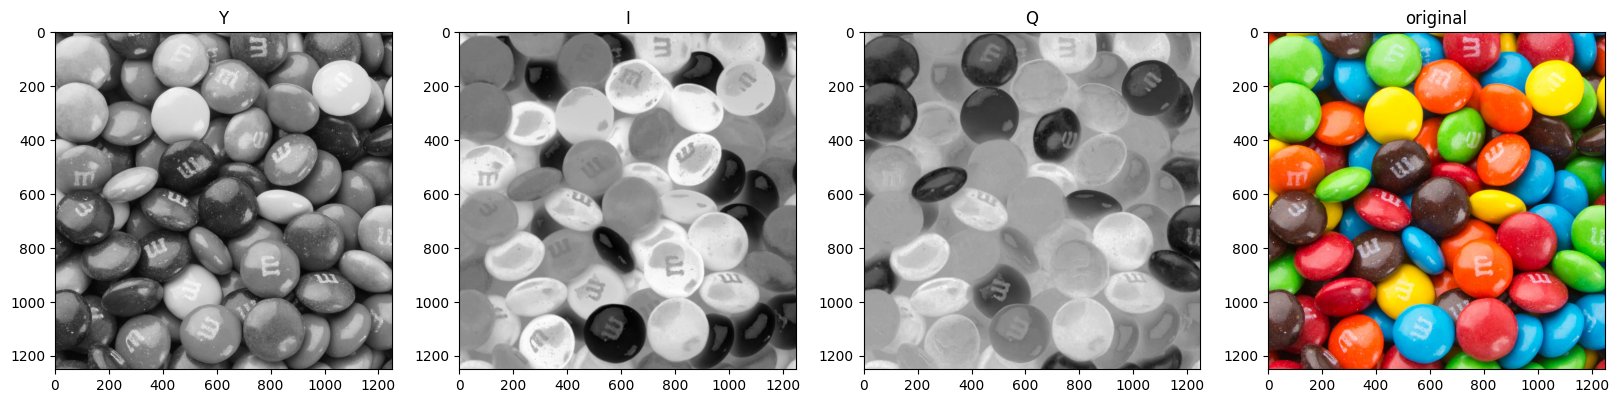

In [20]:
img_mms = imread("mnms.jpg") / 255
yiq_img = rgb_2_yiq(img_mms)

plt.figure(figsize=FIG_SIZE)
for i in range(3): image_plot(i, yiq_img[:, :, i], ['Y', 'I', 'Q'][i])
plt.subplot(1, 4, 4)
plt.title("original")
imshow(img_mms)


- Y, represents the luma component (intensity in the chromatic TV)
- I, represents orange-blue range of colors
- Q, represents the green-purple range of colors

i.e.Each image will be brighter for their component and darker for their complementary component.
i.e. I will be brighter for the orange-blue and darkest for the green-purple

### (c) Apply python function *skimage.color.rgb2yiq* to the RGB image *mnms.jpg*. Compare the obtained result with the result of your function and explain the visual differences, if any.

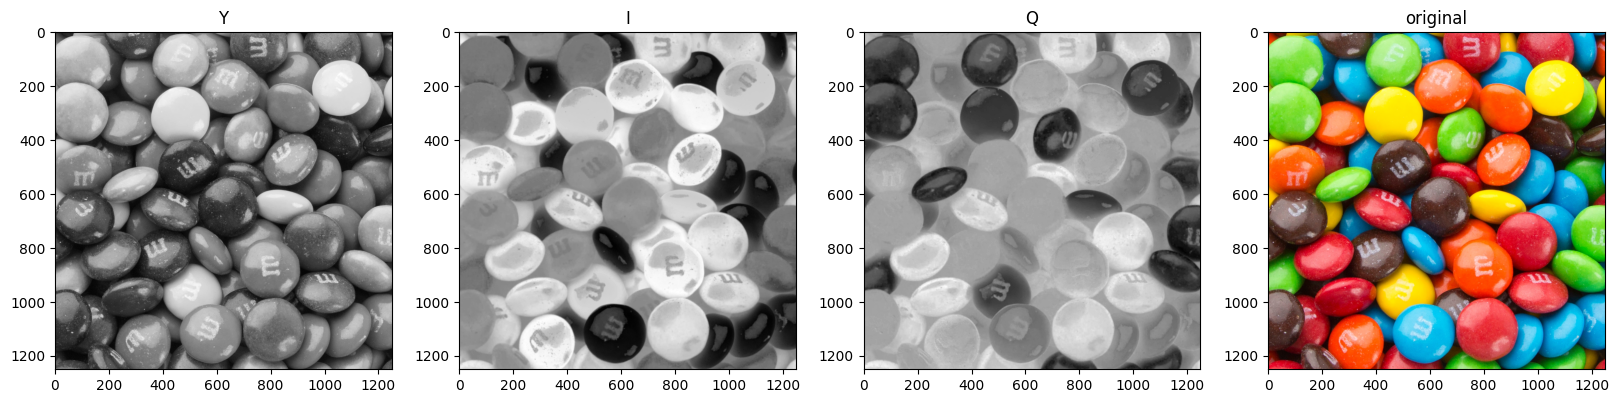

In [21]:
ski_yiq = skc.rgb2yiq(img_mms)

plt.figure(figsize=FIG_SIZE)
for i in range(3): image_plot(i, ski_yiq[:, :, i], ['Y', 'I', 'Q'][i])
plt.subplot(1, 4, 4)
plt.title("original")
imshow(img_mms)

In [22]:
MSE(yiq_img, ski_yiq)

1.964920579037868e-07

Both image are almost identical.

### (d) Use the python function *skimage.color.yiq2rgb* to convert the image back to RGB. Compute the MSE between the result image and the original one. Is this color system transformation lossless or lossy?

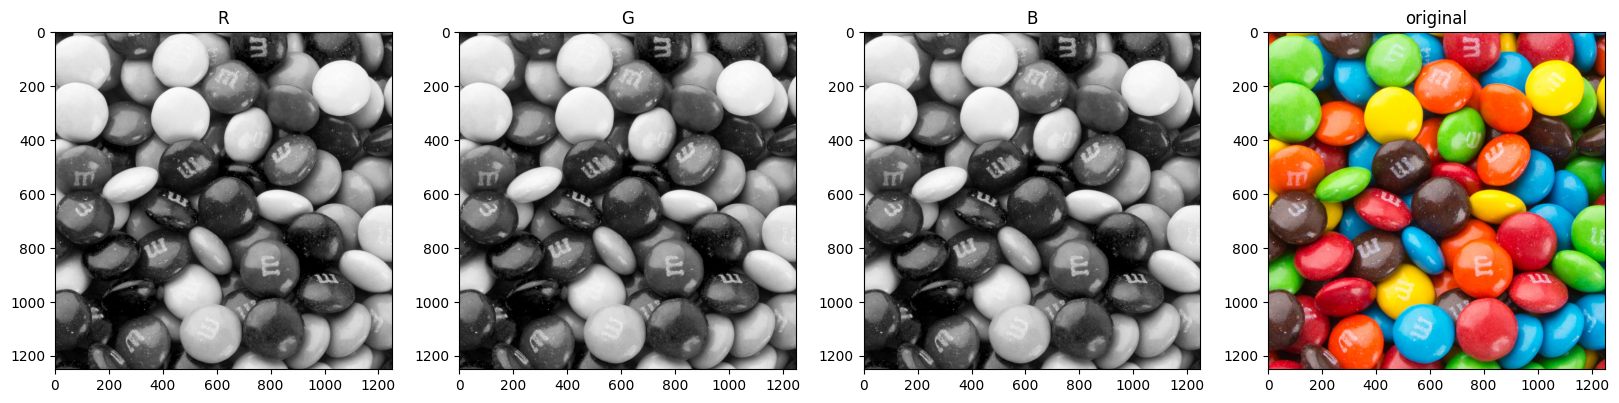

In [23]:
ski_rgb = skc.yiq2rgb(yiq_img)

plt.figure(figsize=FIG_SIZE)
for i in range(3): image_plot(i, ski_rgb[:, :, 1], ['R', 'G', 'B'][i])
plt.subplot(1, 4, 4)
plt.title("original")
imshow(img_mms)

In [24]:
MSE(img_mms, ski_rgb)

8.197995316231474e-07

Difference is almost neglectable. Transformation is (almost) lossless.

---

## Exercise 3 :
*(1 point)*


### Redo Exercise 3 **(a)–(d)** for the YCbCr color system. 

### (a) What is the YCbCr color space? What is the main domain of application for this
color system? What is its advantage against RGB from an application point of view ?

It is the color mixing mode / system used in photography.

- Y is the luma component,
- Cb represents blue difference component
- Cr represents red difference component

It is interesting from an application point of view because:
- Y carries out all luma information and can be encoded with high resolution and high rate (many bits per pixel)
- U/Cband C/Cr represent the residual components that require less band-width in analog TV, can be down-sampled or compressed with less bits in digital standards.


### (b) Write a function that takes an RGB image and converts it to the YCbCr format. Pay attention to the image dynamic range (is it from 0 to 1 or from 0 to 255). Convert the RGB image *mnms.jpg* to the YCbCr using your function. Display each three components as individual gray images. Explain the meaning of each component.

In [25]:
def rgb_2_ycbcr(img):
    Mat = np.array([[0.299, 0.587, 0.114],
           [-0.168736, -0.331264, 0.5],
           [0.5, -0.418688, -0.081312]])
    return np.dot(img, Mat.T) + np.array([0, 0.5, 0.5])

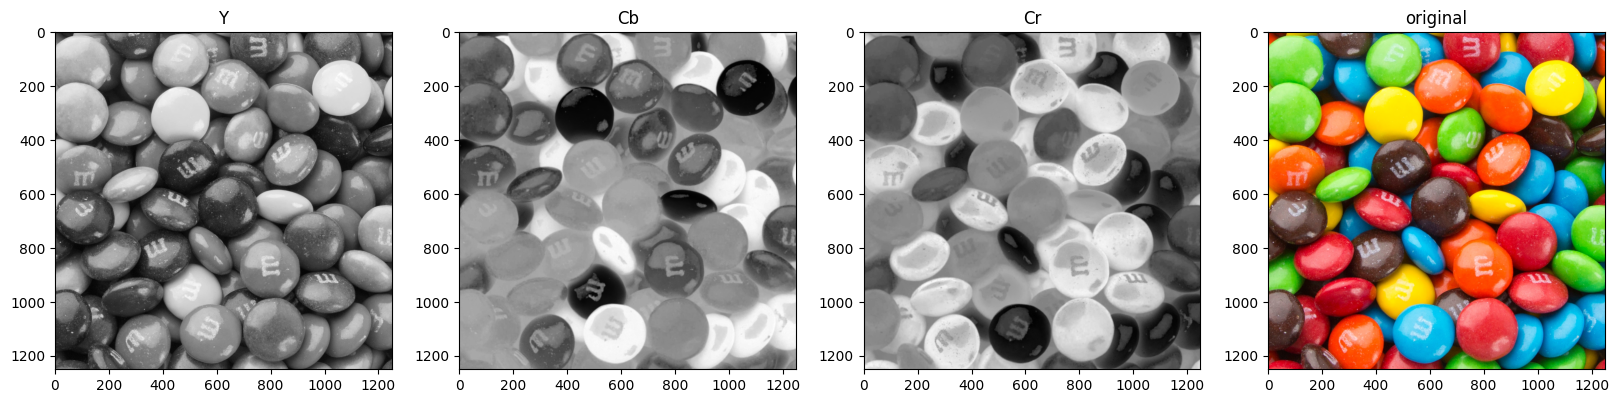

In [26]:
img_mms = imread("mnms.jpg") / 255
ycbcr_img = rgb_2_ycbcr(img_mms)

plt.figure(figsize=FIG_SIZE)
for i in range(3): image_plot(i, ycbcr_img[:, :, i], ['Y', 'Cb', 'Cr'][i])
plt.subplot(1, 4, 4)
plt.title("original")
imshow(img_mms)


- Y is the luma component,
- Cb represents blue difference component
- Cr represents red difference component

### (c) Use *skimage.color.rgb2ycbcr* to convert the RGB image *mnms.jpg* to the YCbCr format. Compare the obtained result with the result of your function and explain the visual differences, if any.

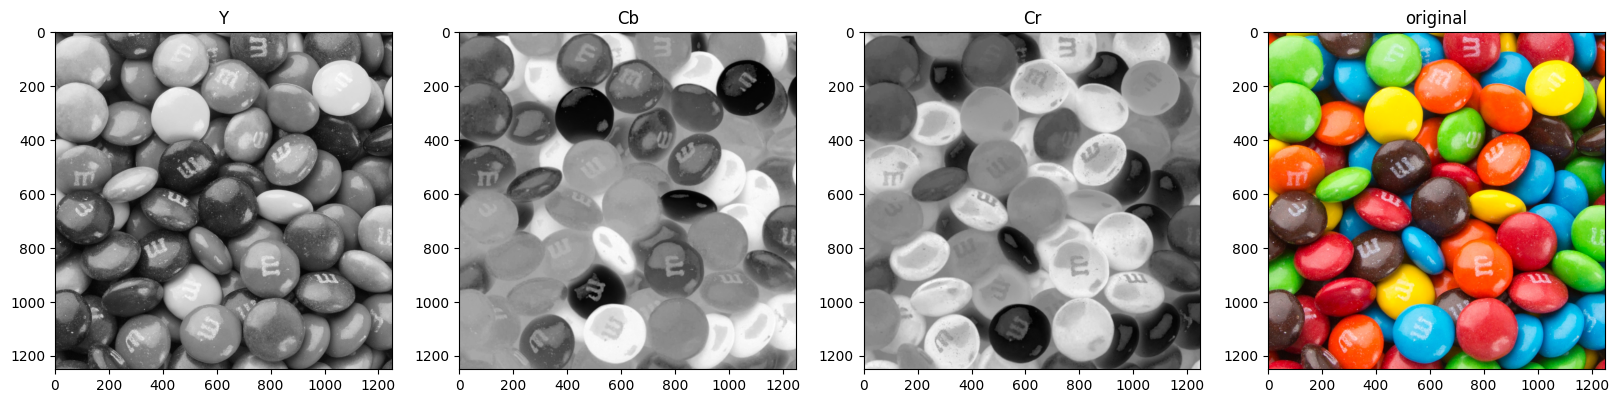

In [27]:
ski_ycbcr =  skc.rgb2ycbcr(img_mms)

plt.figure(figsize=FIG_SIZE)
for i in range(3): image_plot(i, ski_ycbcr[:, :, i], ['Y', 'Cb', 'Cr'][i])
plt.subplot(1, 4, 4)
plt.title("original")
imshow(img_mms)


In [28]:
MSE(ycbcr_img, ski_ycbcr)

50705.74705271085

The MSE is huge but the images looks almost identical to the eyes. But the exercise only required to use to compare the visual differences.

### (d) Use *skimage.color.ycbcr2rgb* to convert the image back to RGB. Compute the MSE between the result image and the original one. Is this color system transformation lossless or lossy?

MSE:  2.681744783773777e-32


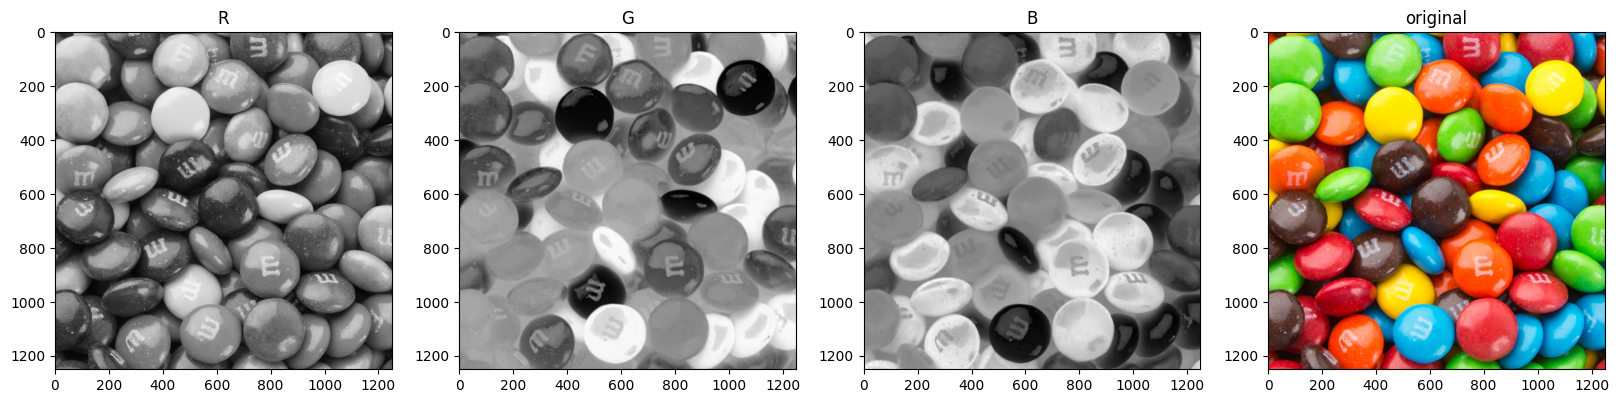

In [29]:
reverted = skc.ycbcr2rgb(ski_ycbcr)
print("MSE: ", MSE(img_mms, reverted))

plt.figure(figsize=FIG_SIZE)
for i in range(3): image_plot(i, ski_ycbcr[:, :, i], ['R', 'G', 'B'][i])
plt.subplot(1, 4, 4)
plt.title("original")
imshow(img_mms)



The mse is null, so the transformation is lossless.
We see that the image we got back is the identical to the original one.


---

## Exercise 4 : 

*(1 point)*

Redo Exercise 3 **(a)**, **(b)** and **(d)** for the CMY color system.

*NB: You will need however to write your own function cmy2rgb for part (d).*

### (a) What is the CMY color space? What is the main domain of application for this
color system? What is its advantage against RGB from an application point of view ?

CMY, Cyan Majenta Yellow, is a subtractive color mixing model, used for printing.

We cannot talk about advantages since we cannot use the rgb system to print.

The cyan magenta and yellow are complimentary To red green blue.

Which makes sense because on Screens. The default state of a pixel is black i.e. turned off, and then we merge a specific amount of red green and blue to obtain the color we want.

Whereas in printing the default state i.e. an empty sheet of paper is white, hence adding the same amount of the rgb colors to the white will not give the same the results.


### (b) Write a function that takes an RGB image and converts it to the CMY format. Pay attention to the image dynamic range (is it from 0 to 1 or from 0 to 255). Convert the RGB image *mnms.jpg* to the CMY using your function. Display each three components as individual gray images. Explain the meaning of each component.

In [30]:
def rgb_2_cmy(cmy: NDArray[f64]) -> NDArray[f64]:
    return 1 - cmy

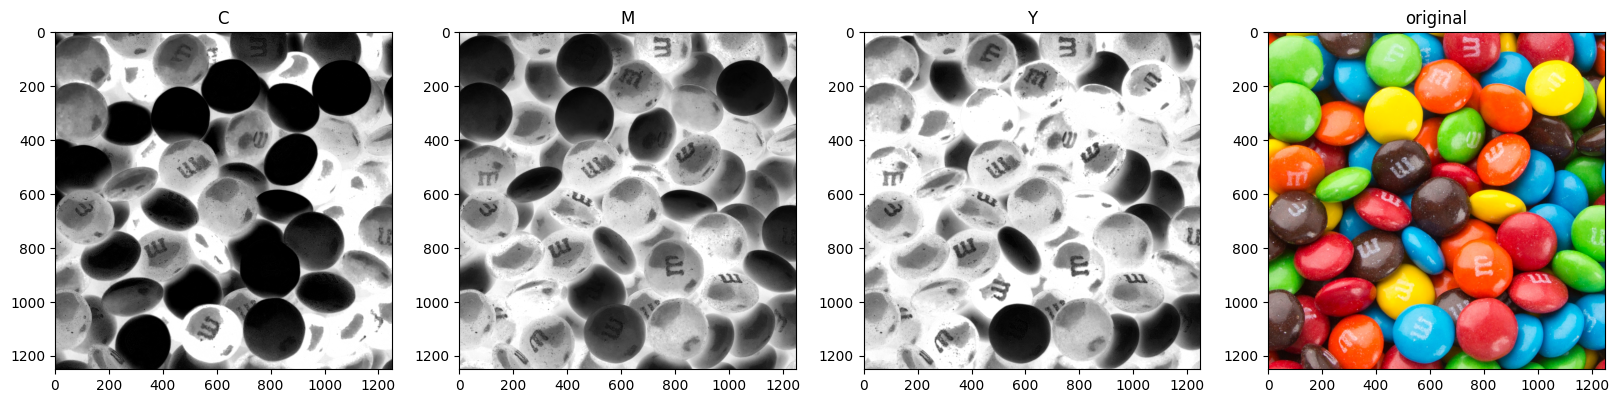

In [31]:
img_mms = imread("mnms.jpg") / 255
cmy_img = rgb_2_cmy(img_mms)

plt.figure(figsize=FIG_SIZE)
for i in range(3): image_plot(i, cmy_img[:, :, i], ['C', 'M', 'Y'][i])

plt.subplot(1, 4, 4)
plt.title("original")
imshow(img_mms)

1. C, The cyan component, will be the brightest when the image is most-cyan. i.e. in the shades of blue to green, but darker for the red components of the original image. (since cyan is the complementary of red)
2. M, The magenta component, idem for the shades of blue and red but darker for the green components of the original image. (since magenta is the complementary of green)
3. Y, The yellow component, idem for the shades of red and green but darker for the blue components of the original image. (since yellow is the complementary of blue)

### (d) Write a function that takes a CMY image and converts it to the RGB format. Pay attention to the image dynamic range (is it from 0 to 1 or from 0 to 255). Convert the CMY image *mnms.jpg* to the RGB using your function. Display each three components as individual gray images. Explain the meaning of each component.

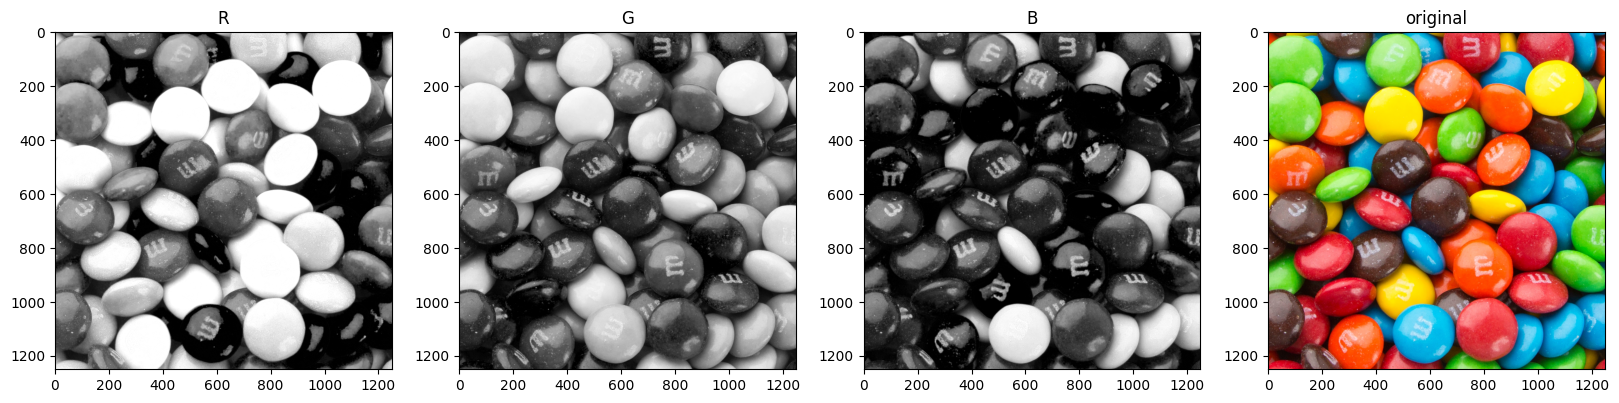

In [32]:
def cmy_2_rgb(cmy: NDArray[f64]) -> NDArray[f64]:
    return 1 - cmy

rgb_img = cmy_2_rgb(cmy_img)

plt.figure(figsize=FIG_SIZE)
for i in range(3): image_plot(i, rgb_img[:, :, i], ['R', 'G', 'B'][i])

plt.subplot(1, 4, 4)
plt.title("original")
imshow(img_mms)

In [33]:
MSE(img_mms, rgb_img)

2.0262184475655653e-33

The mse is null, so the transformation is lossless.
We see that the image we got back is the identical to the original one.

---

## Exercise 5 : 

*(1 point)*

### (a) Explain the difference between the CMY and CMYK color spaces.

Since CMY is the subtractive color model, for printer, adding Cyan, Magenta and Yellow, will subtract all colors from sheet, thus make black.
But mixing every colors every time we need to use black is not efficient, hence the black component K in the model.

This leads to the following advantages over the CMY model:

- Only the black ink is used for the B&W printing like text docs
- The black color is more saturated
- The quality of black text in K is superior the one obtained by mixing CMY

Redo Exercise 4 **(b)** and **(d)** for the CMYK color space.

### (b) Write a function that takes an RGB image and converts it to the CMYK format. Pay attention to the image dynamic range (is it from 0 to 1 or from 0 to 255). Convert the RGB image *mnms.jpg* to the CMYK using your function. Display each four components as individual gray images. Explain the meaning of each component.

In [34]:
def rgb_2_cmyk(img):
    cmy_img = rgb_2_cmy(img)
    C, M, Y = np.squeeze(np.dsplit(cmy_img, 3))
    K = np.min(rgb_2_cmy(img), axis=2)
    return np.dstack((C - K, M - K, Y - K, K))

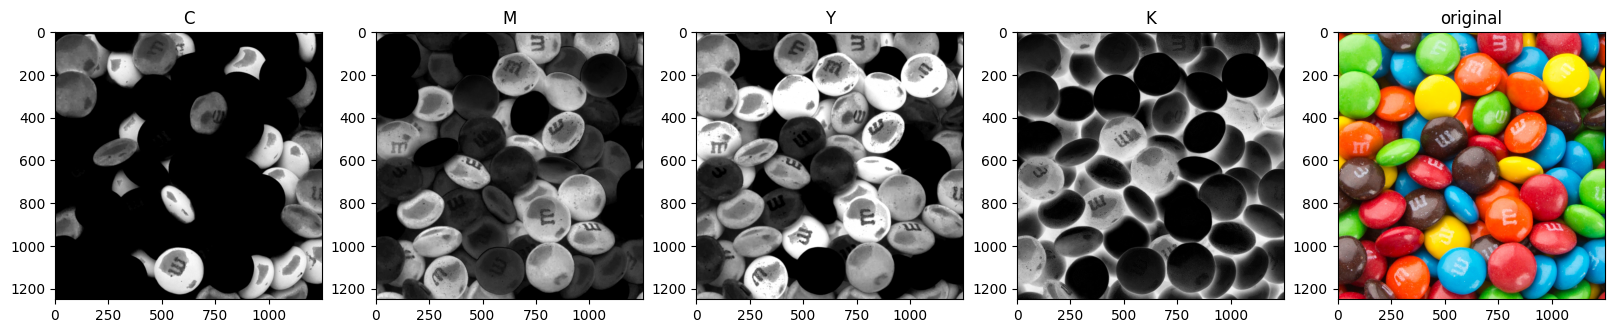

In [35]:
img_mms = imread("mnms.jpg") / 255
cmyk_img = rgb_2_cmyk(img_mms)

plt.figure(figsize=FIG_SIZE)
for i in range(4): image_plot(i, cmyk_img[:, :, i], ['C', 'M', 'Y', 'K'][i], col_nb=5)
plt.subplot(1, 5, 5)
plt.title("original")
imshow(img_mms)


- C is the cyan component
- M is the magenta component
- Y is the yellow component
- K is the black component, it is the minimum of the 3 other components, 
    the formula from the lecture slides gives us: $K = \min(C,M,Y) \in [0, 1]$

### (d) Write a function that takes a CMYK image and converts it to the RGB format. Pay attention to the image dynamic range (is it from 0 to 1 or from 0 to 255). Convert the CMYK image *mnms.jpg* to the RGB using your function. Display each three components as individual gray images. Explain the meaning of each component.

In [36]:
def cmyk_2_rgb(img):
    """Just do the inverse as above"""
    C, M, Y, K = np.squeeze(np.dsplit(img, 4))
    #C,M,Y,K=np.squeeze(np.dsplit(cmyk_img,4))
    #C,M,Y=C+K,M+K,Y+K
    #return cmy_2_rgb(np.dstack((C,M,Y)))
    return cmy_2_rgb(np.dstack((C + K, M + K, Y + K)))


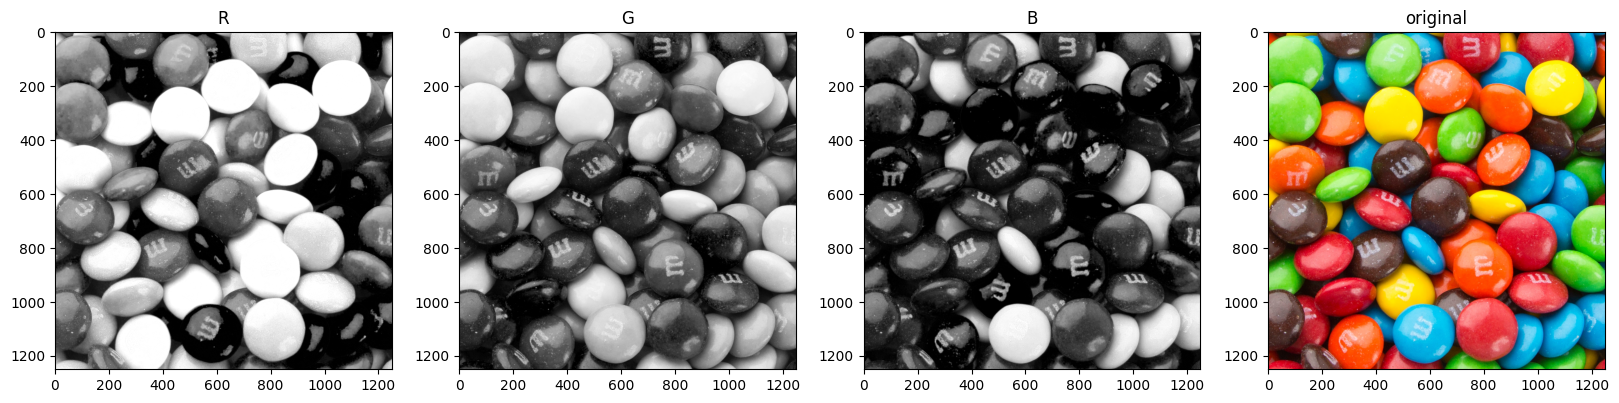

In [37]:
img_mms = imread("mnms.jpg") / 255
#cmyk_img = rgb_2_cmyk(img_mms)
reverted = cmyk_2_rgb(rgb_2_cmyk(img_mms))

plt.figure(figsize=FIG_SIZE)
for i in range(3): image_plot(i, reverted[:, :, i], ['R', 'G', 'B'][i])
plt.subplot(1, 4, 4)
plt.title("original")
imshow(img_mms)


In [38]:
MSE(img_mms, reverted)

2.0262184475655653e-33

Once again, MSE is null, so the transformation is lossless.

---

## Exercise 6 :

(1 point)

### (a) Outline the primary focusing disorders in the human visual system (HVS). Detail current solutions for each. Organize the information in a schematic format.

*Hint: emmetropia, myopia, hypermetropia, astigmatism*

1. **emmetropia**
    Emmetropia is perfect vision where the eye can naturally focus on distant objects without needing glasses or lenses.

<br />
 
2. **myopia**
    Having trouble seeing from afar. The image is focused in front of the retina. So the furthest the image the blurrier it is.

<br />
 
3. **hypermetropia**
    Having trouble seeing from close. The image is focused behind the retina. So the closest the image the blurrier it is. Inverse of myopia.

<br />
 
4. **astigmatism**
    Astigmatism happens when the cornea / lens has an anormal shape, making light bend differently as it enters the eye, causing a refractive error. Astigmatism worsens depth perception of the eye since it blurs the edges and outlines of everything you see.


### (b) Compare focusing mechanisms in the human visual system (HVS) and contemporary cameras. Highlight the key differences.

Differences between the human visual system and modern cameras center on adaptability: our eyes dynamically adjust for varying distances and lighting, while cameras require manual or automatic alterations to achieve similar effects.